# Rf 7 0 7_Kernelestimation
Speecial p.d.f.'s: using non-parametric (multi-dimensional) kernel estimation p.d.f.s



**Author:** 07/2008 - Wouter Verkerke  
<i><small>This notebook tutorial was automatically generated with <a href= "https://github.com/root-project/root/blob/master/documentation/doxygen/converttonotebook.py">ROOTBOOK-izer</a> from the macro found in the ROOT repository  on Thursday, August 29, 2019 at 03:03 AM.</small></i>

In [1]:
%%cpp -d
#include "RooRealVar.h"
#include "RooDataSet.h"
#include "RooGaussian.h"
#include "RooConstVar.h"
#include "RooPolynomial.h"
#include "RooKeysPdf.h"
#include "RooNDKeysPdf.h"
#include "RooProdPdf.h"
#include "TCanvas.h"
#include "TAxis.h"
#include "TH1.h"
#include "RooPlot.h"

In [2]:
%%cpp -d
// This is a workaround to make sure the namespace is used inside functions
using namespace RooFit;

Create low stats 1-d dataset
 -------------------------------------------------------

Create a toy pdf for sampling

In [3]:
RooRealVar x("x", "x", 0, 20);
RooPolynomial p("p", "p", x, RooArgList(RooConst(0.01), RooConst(-0.01), RooConst(0.0004)));


RooFit v3.60 -- Developed by Wouter Verkerke and David Kirkby 
                Copyright (C) 2000-2013 NIKHEF, University of California & Stanford University
                All rights reserved, please read http://roofit.sourceforge.net/license.txt



Sample 500 events from p

In [4]:
RooDataSet *data1 = p.generate(x, 200);

Create 1-d kernel estimation pdf
 ---------------------------------------------------------------

Create adaptive kernel estimation pdf. in this configuration the input data
 is mirrored over the boundaries to minimize edge effects in distribution
 that do not fall to zero towards the edges

In [5]:
RooKeysPdf kest1("kest1", "kest1", x, *data1, RooKeysPdf::MirrorBoth);

An adaptive kernel estimation pdf on the same data without mirroring option
 for comparison

In [6]:
RooKeysPdf kest2("kest2", "kest2", x, *data1, RooKeysPdf::NoMirror);

Adaptive kernel estimation pdf with increased bandwidth scale factor
 (promotes smoothness over detail preservation)

In [7]:
RooKeysPdf kest3("kest1", "kest1", x, *data1, RooKeysPdf::MirrorBoth, 2);

Plot kernel estimation pdfs with and without mirroring over data

In [8]:
RooPlot *frame = x.frame(Title("Adaptive kernel estimation pdf with and w/o mirroring"), Bins(20));
data1->plotOn(frame);
kest1.plotOn(frame);
kest2.plotOn(frame, LineStyle(kDashed), LineColor(kRed));

Plot kernel estimation pdfs with regular and increased bandwidth

In [9]:
RooPlot *frame2 = x.frame(Title("Adaptive kernel estimation pdf with regular, increased bandwidth"));
kest1.plotOn(frame2);
kest3.plotOn(frame2, LineColor(kMagenta));

Create low stats 2-d dataset
 -------------------------------------------------------

Construct a 2d toy pdf for sampling

In [10]:
RooRealVar y("y", "y", 0, 20);
RooPolynomial py("py", "py", y, RooArgList(RooConst(0.01), RooConst(0.01), RooConst(-0.0004)));
RooProdPdf pxy("pxy", "pxy", RooArgSet(p, py));
RooDataSet *data2 = pxy.generate(RooArgSet(x, y), 1000);

Create 2-d kernel estimation pdf
 ---------------------------------------------------------------

Create 2d adaptive kernel estimation pdf with mirroring

In [11]:
RooNDKeysPdf kest4("kest4", "kest4", RooArgSet(x, y), *data2, "am");

Create 2d adaptive kernel estimation pdf with mirroring and double bandwidth

In [12]:
RooNDKeysPdf kest5("kest5", "kest5", RooArgSet(x, y), *data2, "am", 2);

Create a histogram of the data

In [13]:
TH1 *hh_data = data2->createHistogram("hh_data", x, Binning(10), YVar(y, Binning(10)));

Create histogram of the 2d kernel estimation pdfs

In [14]:
TH1 *hh_pdf = kest4.createHistogram("hh_pdf", x, Binning(25), YVar(y, Binning(25)));
TH1 *hh_pdf2 = kest5.createHistogram("hh_pdf2", x, Binning(25), YVar(y, Binning(25)));
hh_pdf->SetLineColor(kBlue);
hh_pdf2->SetLineColor(kMagenta);

TCanvas *c = new TCanvas("rf707_kernelestimation", "rf707_kernelestimation", 800, 800);
c->Divide(2, 2);
c->cd(1);
gPad->SetLeftMargin(0.15);
frame->GetYaxis()->SetTitleOffset(1.4);
frame->Draw();
c->cd(2);
gPad->SetLeftMargin(0.15);
frame2->GetYaxis()->SetTitleOffset(1.8);
frame2->Draw();
c->cd(3);
gPad->SetLeftMargin(0.15);
hh_data->GetZaxis()->SetTitleOffset(1.4);
hh_data->Draw("lego");
c->cd(4);
gPad->SetLeftMargin(0.20);
hh_pdf->GetZaxis()->SetTitleOffset(2.4);
hh_pdf->Draw("surf");
hh_pdf2->Draw("surfsame");

Draw all canvases 

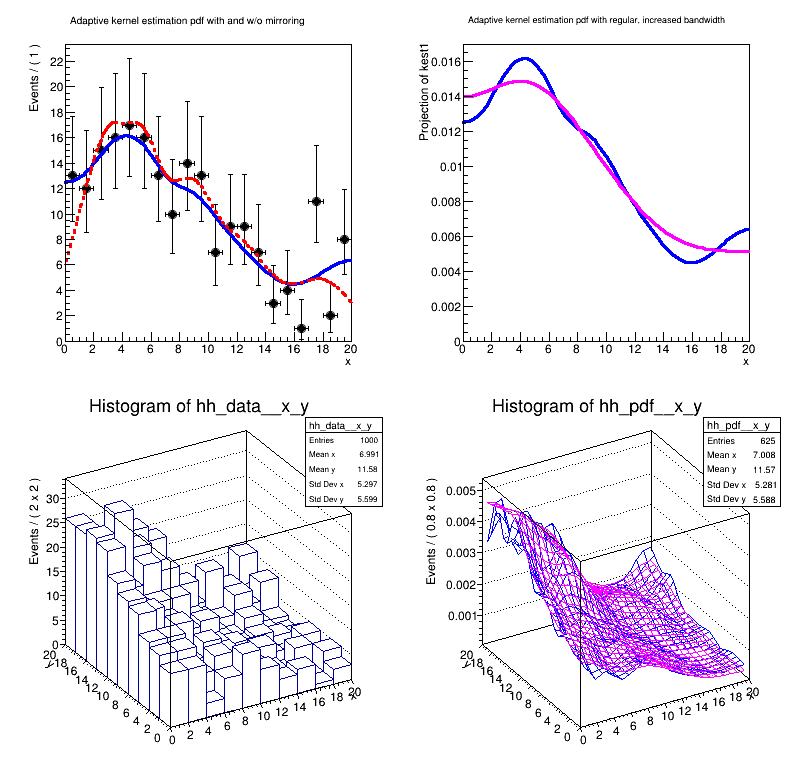

In [15]:
gROOT->GetListOfCanvases()->Draw()